In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris, load_wine, load_breast_cancer

### 1. Klasifikasi dengan Data Iris

In [2]:
df_iris = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
df_iris['label'] = load_iris().target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
x_train, x_test, y_train, y_test = train_test_split(df_iris.iloc[:, :-1], df_iris[['label']], test_size=0.2)

In [4]:
decision_tree = DecisionTreeClassifier()

In [5]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [7]:
decision_tree._get_param_names

<bound method BaseEstimator._get_param_names of <class 'sklearn.tree._classes.DecisionTreeClassifier'>>

In [65]:
results = decision_tree.predict(x_test)
print('Nilai Akurasi: {:.2f}'.format(accuracy_score(y_test, results)))

Nilai Akurasi: 0.93


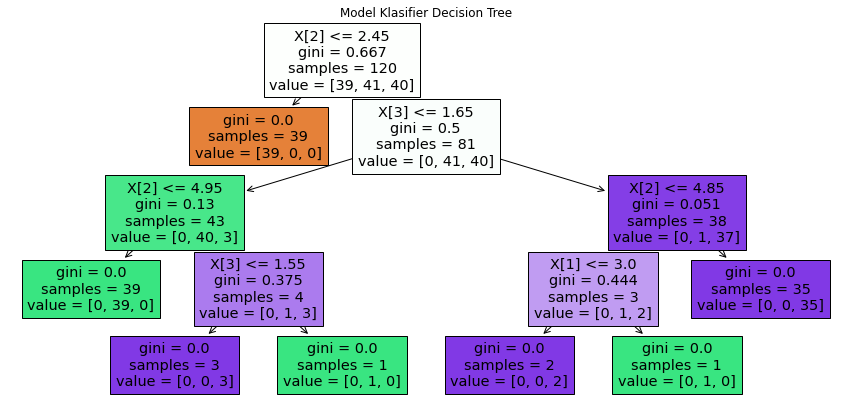

In [66]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create plot size 15, 7
plt.figure(figsize=(15, 7))
plot_tree(decision_tree, filled=True)
plt.title('Model Klasifier Decision Tree')
plt.show()

Nilai Akurasi: 0.97


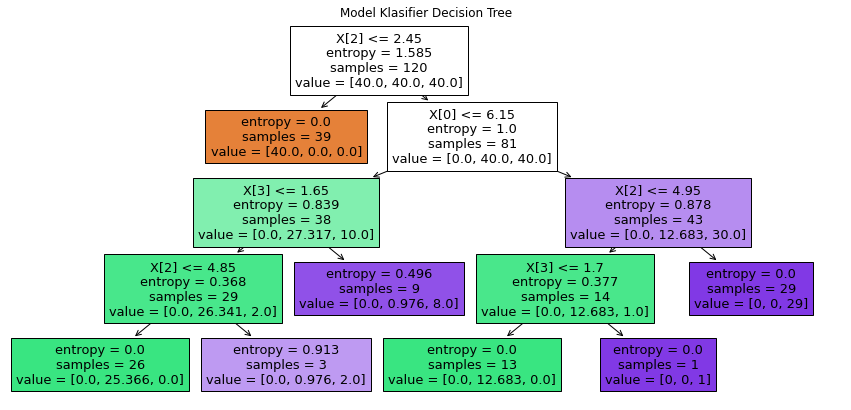

In [68]:
# Hyperparameter Tuning DecisionTreeClassifier with GridSearchCV
decision_tree = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    max_depth=5,
    min_samples_split=10,
    max_features='auto',
    class_weight='balanced'
)

decision_tree.fit(x_train, y_train)
results = decision_tree.predict(x_test)
print('Nilai Akurasi: {:.2f}'.format(accuracy_score(y_test, results)))

# Create plot size 15, 7
plt.figure(figsize=(15, 7))
plot_tree(decision_tree, filled=True)
plt.title('Model Klasifier Decision Tree')
plt.show()

### 2. Klasifikasi dengan Data Wine

In [3]:
df_wine = pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
df_wine['label'] = load_wine().target
df_wine.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [8]:
print('Atribut data: \n{}'.format(df_wine.columns.values))
print('Jumlah atribut data: {}'.format(df_wine.shape[1]))

Atribut data: 
['alcohol' 'malic_acid' 'ash' 'alcalinity_of_ash' 'magnesium'
 'total_phenols' 'flavanoids' 'nonflavanoid_phenols' 'proanthocyanins'
 'color_intensity' 'hue' 'od280/od315_of_diluted_wines' 'proline' 'label']
Jumlah atribut data: 14


### 3. Klasifikasi dengan Data Breast Cancer

In [4]:
df_bc = pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
df_bc['label'] = load_breast_cancer().target
df_bc.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
print('Atribut data: \n{}'.format(df_bc.columns.values))
print('Jumlah atribut data: {}'.format(df_bc.shape[1]))

Atribut data: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension' 'label']
Jumlah atribut data: 31
